In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import TTestIndPower
from scipy import stats

Task 1

In [3]:
data = {
    "User Segment": ["Overall", "Age 18-24", "Age 25-34", "Returning Visitors", "New Visitors"],
    "Page Views": [10000, 5000, 3000, 6000, 4000],
    "Avg. Time Spent (mins)": [2.0, 1.5, 2.5, 3.0, 1.0],
    "Bounce Rate (%)": [65, 70, 60, 50, 75]
}

df = pd.DataFrame(data)

df


,User Segment,Page Views,Avg. Time Spent (mins),Bounce Rate (%)
0,Overall,10000,2.0,65
1,Age 18-24,5000,1.5,70
2,Age 25-34,3000,2.5,60
3,Returning Visitors,6000,3.0,50
4,New Visitors,4000,1.0,75


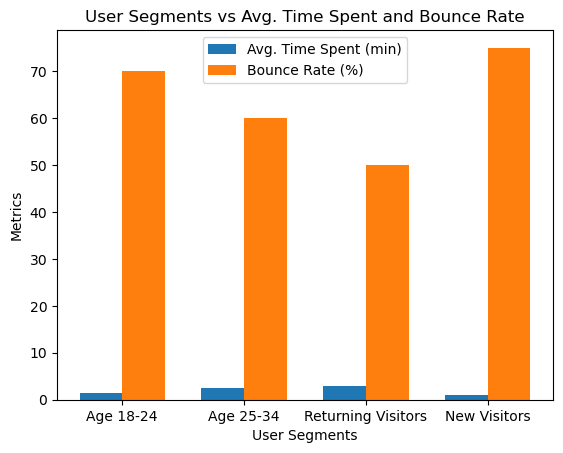

In [4]:
user_segments = df['User Segment'][1:]  
avg_time_spent = df['Avg. Time Spent (mins)'][1:]  
bounce_rate = df['Bounce Rate (%)'][1:]  

bar_width = 0.35
index = np.arange(len(user_segments))

fig, ax = plt.subplots()
bar1 = ax.bar(index, avg_time_spent, bar_width, label='Avg. Time Spent (min)')
bar2 = ax.bar(index + bar_width, bounce_rate, bar_width, label='Bounce Rate (%)')

ax.set_xlabel('User Segments')
ax.set_ylabel('Metrics')
ax.set_title('User Segments vs Avg. Time Spent and Bounce Rate')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(user_segments)
ax.legend()

plt.show()


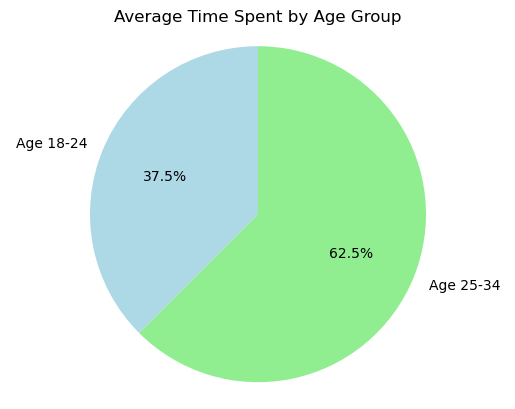

In [5]:
labels = df['User Segment'][1:3]  
sizes = df['Avg. Time Spent (mins)'][1:3]  
colors = ['lightblue', 'lightgreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  

plt.title('Average Time Spent by Age Group')
plt.show()


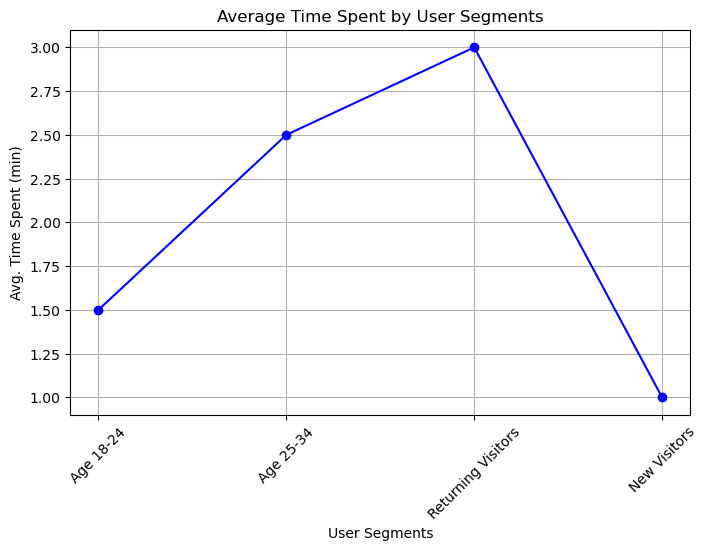

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(user_segments, avg_time_spent, marker='o', linestyle='-', color='blue')
plt.title('Average Time Spent by User Segments')
plt.xlabel('User Segments')
plt.ylabel('Avg. Time Spent (min)')
plt.grid()
plt.xticks(rotation=45)
plt.show()


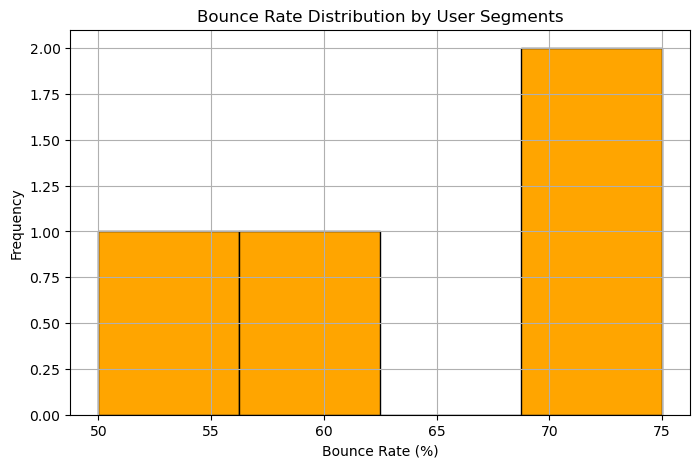

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df['Bounce Rate (%)'][1:], bins=4, color='orange', edgecolor='black')
plt.title('Bounce Rate Distribution by User Segments')
plt.xlabel('Bounce Rate (%)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [8]:
df['Engagement Ratio (mins per view)'] = df['Avg. Time Spent (mins)'] / (df['Page Views'] / 1000) 

print("Engagement Ratios (mins per 1000 page views):")
print(df[['User Segment', 'Engagement Ratio (mins per view)']])


Engagement Ratios (mins per 1000 page views):
         User Segment  Engagement Ratio (mins per view)
0             Overall                          0.200000
1           Age 18-24                          0.300000
2           Age 25-34                          0.833333
3  Returning Visitors                          0.500000
4        New Visitors                          0.250000


In [9]:
np.random.seed(42)  

data = {
    'user_id': np.arange(1, 101),
    'group': np.random.choice(['A', 'B'], size=100), 
    'time_spent': np.random.normal(loc=3, scale=1, size=100),  
}

data['time_spent'][data['group'] == 'A'] += np.random.normal(loc=0.5, scale=0.5, size=(data['group'] == 'A').sum())
data['time_spent'][data['group'] == 'B'] += np.random.normal(loc=-0.5, scale=0.5, size=(data['group'] == 'B').sum())

df = pd.DataFrame(data)
print(df.head())


   user_id group  time_spent
0        1     A    4.352197
1        2     B    2.559637
2        3     A    4.037923
3        4     A    2.395155
4        5     A    2.113795


In [10]:
results = df.groupby('group')['time_spent'].agg(['mean', 'std', 'count'])
print(results)

group_a = df[df['group'] == 'A']['time_spent']
group_b = df[df['group'] == 'B']['time_spent']

t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


           mean       std  count
group                           
A      3.638675  0.996870     44
B      2.437026  1.095458     56
T-statistic: 5.662795288080099, P-value: 1.488395322987869e-07


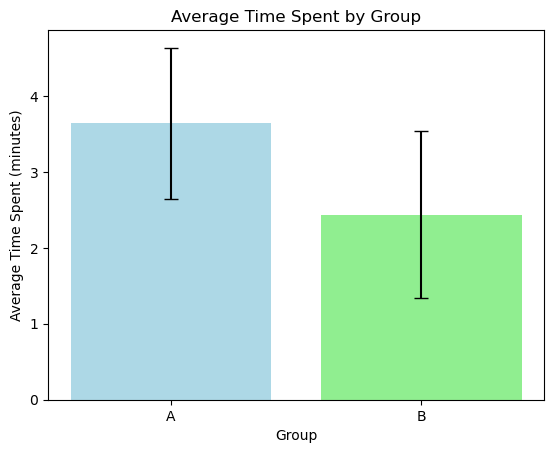

In [11]:
import matplotlib.pyplot as plt

plt.bar(results.index, results['mean'], yerr=results['std'], capsize=5, color=['lightblue', 'lightgreen'])
plt.title('Average Time Spent by Group')
plt.xlabel('Group')
plt.ylabel('Average Time Spent (minutes)')
plt.show()


Task 2

In [13]:
np.random.seed(42)  

data = {
    'user_id': np.arange(1, 201),
    'group': np.random.choice(['A', 'B'], size=200),  
    'time_spent': np.random.normal(loc=4, scale=1.5, size=200),  
    'bounce': np.random.choice([0, 1], size=200, p=[0.6, 0.4])  
}

data['time_spent'][data['group'] == 'A'] += np.random.normal(loc=1, scale=0.5, size=(data['group'] == 'A').sum())
data['time_spent'][data['group'] == 'B'] += np.random.normal(loc=-1, scale=0.5, size=(data['group'] == 'B').sum())

df = pd.DataFrame(data)
print(df.head())


   user_id group  time_spent  bounce
0        1     A    5.006089       0
1        2     B    2.220177       1
2        3     A    5.623427       0
3        4     A    2.341335       0
4        5     A    5.354808       1


In [14]:
results = df.groupby('group').agg({
    'time_spent': ['mean', 'std', 'count'],
    'bounce': 'mean'  
}).rename(columns={'mean': 'Average', 'std': 'Std Dev', 'count': 'Count'})
results.columns = ['Average Time Spent', 'Std Dev Time Spent', 'Count', 'Bounce Rate']
print(results)

group_a_time_spent = df[df['group'] == 'A']['time_spent']
group_b_time_spent = df[df['group'] == 'B']['time_spent']

t_stat, p_value_time = stats.ttest_ind(group_a_time_spent, group_b_time_spent)

group_a_bounce = df[df['group'] == 'A']['bounce']
group_b_bounce = df[df['group'] == 'B']['bounce']

t_stat_bounce, p_value_bounce = stats.ttest_ind(group_a_bounce, group_b_bounce)

print(f"T-statistic (Time Spent): {t_stat}, P-value (Time Spent): {p_value_time}")
print(f"T-statistic (Bounce Rate): {t_stat_bounce}, P-value (Bounce Rate): {p_value_bounce}")


       Average Time Spent  Std Dev Time Spent  Count  Bounce Rate
group                                                            
A                5.045067            1.711133    100         0.47
B                2.935460            1.428136    100         0.46
T-statistic (Time Spent): 9.465213096052432, P-value (Time Spent): 8.971231130345172e-18
T-statistic (Bounce Rate): 0.14106557867685868, P-value (Bounce Rate): 0.8879615502057259


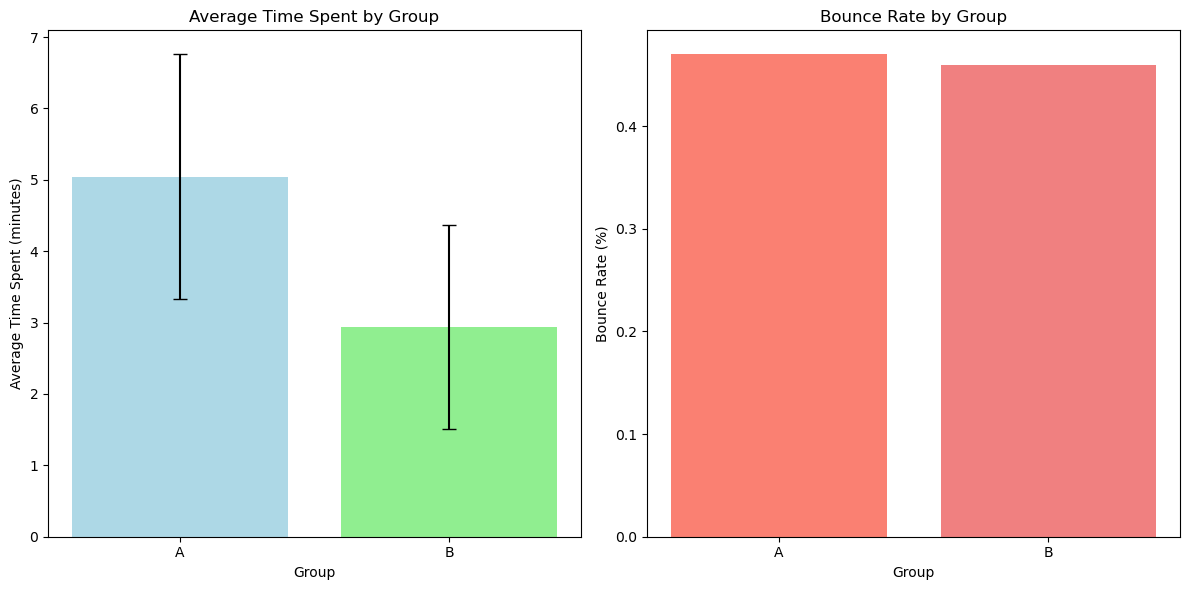

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(results.index, results['Average Time Spent'], yerr=results['Std Dev Time Spent'], capsize=5, color=['lightblue', 'lightgreen'])
plt.title('Average Time Spent by Group')
plt.xlabel('Group')
plt.ylabel('Average Time Spent (minutes)')

plt.subplot(1, 2, 2)
plt.bar(results.index, results['Bounce Rate'], color=['salmon', 'lightcoral'])
plt.title('Bounce Rate by Group')
plt.xlabel('Group')
plt.ylabel('Bounce Rate (%)')

plt.tight_layout()
plt.show()


In [16]:
effect_size = 0.5  
alpha = 0.05       
power = 0.8        

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(f'Required sample size per group: {sample_size:.0f}')


Required sample size per group: 64


Task 3

In [18]:
data = {
    'Arc': [
        'The Beginning of a New Journey', 
        'The Dungeons', 
        'The Reawakening', 
        'The Second Awakening', 
        'The Demon Castle', 
        'The Monarchs', 
        'The National Level', 
        'The One Who Will Reign', 
        'The Final Battle', 
        'The End', 
        'The Future'
    ],
    'Popularity_Score': [9.0, 8.7, 9.5, 9.2, 8.9, 9.6, 9.3, 9.1, 9.4, 8.8, 9.7],
    'Readers_Rating': [4.5, 4.3, 4.8, 4.6, 4.4, 4.9, 4.5, 4.7, 4.8, 4.2, 4.9],
    'Chapter_Count': [10, 12, 15, 14, 16, 13, 11, 15, 9, 10, 8]
}

df = pd.DataFrame(data)
print(df)


                               Arc  Popularity_Score  Readers_Rating  \
0   The Beginning of a New Journey               9.0             4.5   
1                     The Dungeons               8.7             4.3   
2                  The Reawakening               9.5             4.8   
3             The Second Awakening               9.2             4.6   
4                 The Demon Castle               8.9             4.4   
5                     The Monarchs               9.6             4.9   
6               The National Level               9.3             4.5   
7           The One Who Will Reign               9.1             4.7   
8                 The Final Battle               9.4             4.8   
9                          The End               8.8             4.2   
10                      The Future               9.7             4.9   

    Chapter_Count  
0              10  
1              12  
2              15  
3              14  
4              16  
5              

In [19]:
descriptive_stats = df.describe()
print(descriptive_stats)


       Popularity_Score  Readers_Rating  Chapter_Count
count         11.000000       11.000000      11.000000
mean           9.200000        4.600000      12.090909
std            0.331662        0.240832       2.700168
min            8.700000        4.200000       8.000000
25%            8.950000        4.450000      10.000000
50%            9.200000        4.600000      12.000000
75%            9.450000        4.800000      14.500000
max            9.700000        4.900000      16.000000


In [20]:
correlation = df.select_dtypes(include='number').corr()
print(correlation)


                  Popularity_Score  Readers_Rating  Chapter_Count
Popularity_Score          1.000000        0.926449      -0.189829
Readers_Rating            0.926449        1.000000      -0.046134
Chapter_Count            -0.189829       -0.046134       1.000000


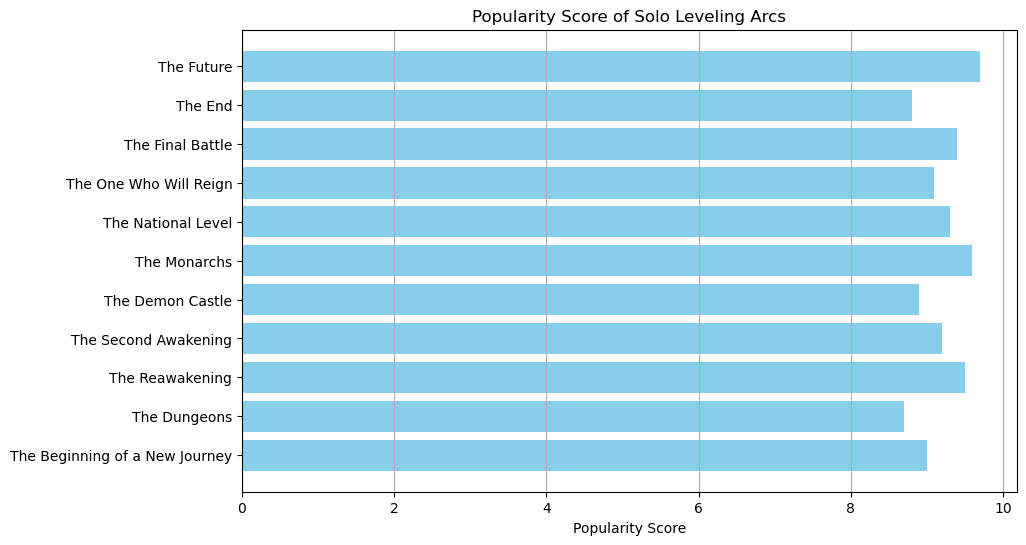

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(df['Arc'], df['Popularity_Score'], color='skyblue')
plt.xlabel('Popularity Score')
plt.title('Popularity Score of Solo Leveling Arcs')
plt.grid(axis='x')
plt.show()


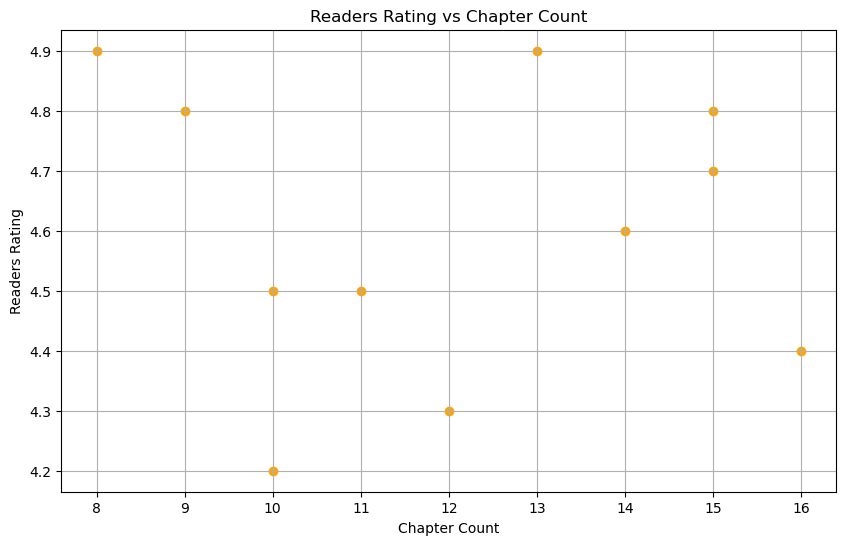

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Chapter_Count'], df['Readers_Rating'], color='orange')
plt.xlabel('Chapter Count')
plt.ylabel('Readers Rating')
plt.title('Readers Rating vs Chapter Count')
plt.grid()
plt.show()
